   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 10.2/920.8 kB ? eta -:--:--
   ---------------------------------------- 10.2/920.8 kB ? eta -:--:--
    -------------------------------------- 20.5/920.8 kB 131.3 kB/s eta 0:00:07
   - ------------------------------------- 41.0/920.8 kB 196.9 kB/s eta 0:00:05
   - ------------------------------------- 41.0/920.8 kB 196.9 kB/s eta 0:00:05
   --- ----------------------------------- 71.7/920.8 kB 245.8 kB/s eta 0:00:04
   --- ----------------------------------- 92.2/920.8 kB 309.1 kB/s eta 0:00:03
   ---- --------------------------------- 112.6/920.8 kB 312.2 kB/s eta 0:00:03
   ----- -------------------------------- 143.4/920.8 kB 341.3 kB/s eta 0:00:03
   ------ ------------------------------- 153.6/920.8 kB 339.7 kB/s eta 0:00:03
   ------- ------------------------------ 174.1/920.8 kB 361.7 kB/s eta 0:

C:\Users\ADMIN\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


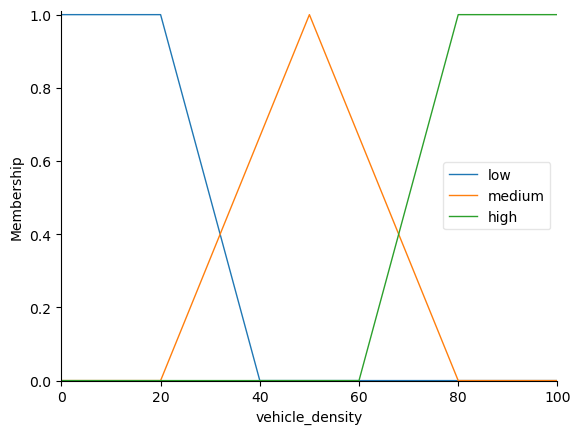

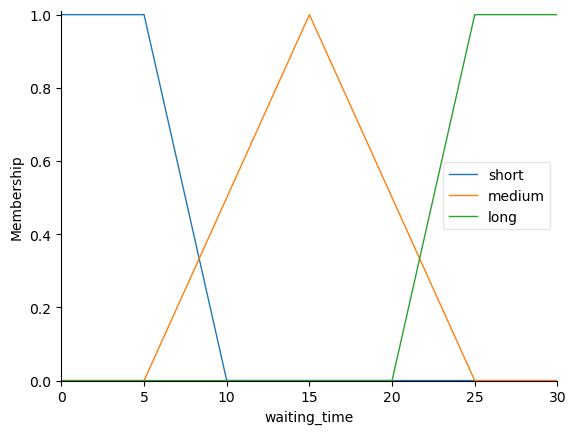

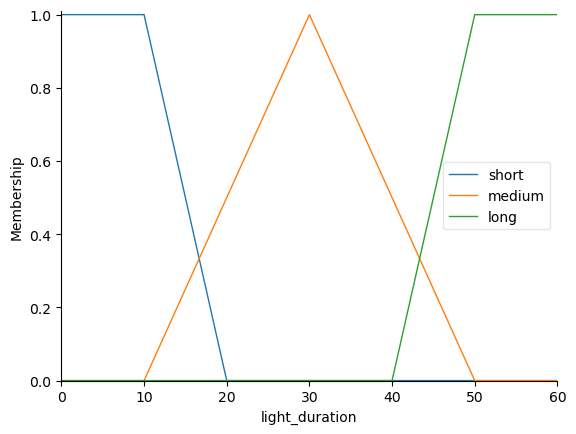

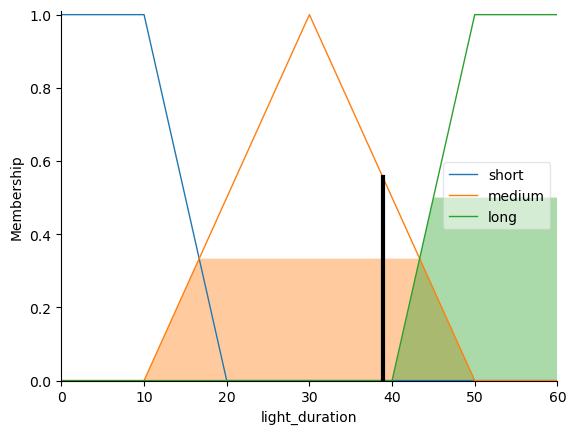

In [4]:
# Step 0: Install the required library (if not already installed)
# Uncomment and run the following line if scikit-fuzzy isn't installed:

!pip install scikit-fuzzy

# Import necessary libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Step 1: Define the inputs (Antecedents) and output (Consequent)
# Vehicle density on the main road and waiting time on the side road
vehicle_density = ctrl.Antecedent(np.arange(0, 101, 1), 'vehicle_density')
waiting_time = ctrl.Antecedent(np.arange(0, 31, 1), 'waiting_time')
light_duration = ctrl.Consequent(np.arange(0, 61, 1), 'light_duration')

# Step 2: Define fuzzy sets for each variable
# Vehicle density categories: Low, Medium, High
vehicle_density['low'] = fuzz.trapmf(vehicle_density.universe, [0, 0, 20, 40])
vehicle_density['medium'] = fuzz.trimf(vehicle_density.universe, [20, 50, 80])
vehicle_density['high'] = fuzz.trapmf(vehicle_density.universe, [60, 80, 100, 100])

# Waiting time categories: Short, Medium, Long
waiting_time['short'] = fuzz.trapmf(waiting_time.universe, [0, 0, 5, 10])
waiting_time['medium'] = fuzz.trimf(waiting_time.universe, [5, 15, 25])
waiting_time['long'] = fuzz.trapmf(waiting_time.universe, [20, 25, 30, 30])

# Light duration categories: Short, Medium, Long
light_duration['short'] = fuzz.trapmf(light_duration.universe, [0, 0, 10, 20])
light_duration['medium'] = fuzz.trimf(light_duration.universe, [10, 30, 50])
light_duration['long'] = fuzz.trapmf(light_duration.universe, [40, 50, 60, 60])

# Step 3: Define fuzzy rules
rule1 = ctrl.Rule(vehicle_density['low'] & waiting_time['short'], light_duration['short'])
rule2 = ctrl.Rule(vehicle_density['low'] & waiting_time['medium'], light_duration['medium'])
rule3 = ctrl.Rule(vehicle_density['low'] & waiting_time['long'], light_duration['medium'])
rule4 = ctrl.Rule(vehicle_density['medium'] & waiting_time['short'], light_duration['medium'])
rule5 = ctrl.Rule(vehicle_density['medium'] & waiting_time['medium'], light_duration['medium'])
rule6 = ctrl.Rule(vehicle_density['medium'] & waiting_time['long'], light_duration['long'])
rule7 = ctrl.Rule(vehicle_density['high'] & waiting_time['short'], light_duration['medium'])
rule8 = ctrl.Rule(vehicle_density['high'] & waiting_time['medium'], light_duration['long'])
rule9 = ctrl.Rule(vehicle_density['high'] & waiting_time['long'], light_duration['long'])

# Step 4: Create a control system and simulation
traffic_light_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
traffic_light_sim = ctrl.ControlSystemSimulation(traffic_light_ctrl)

# Step 5: Test the system with sample inputs
# Example: Vehicle density = 70, Waiting time = 15
traffic_light_sim.input['vehicle_density'] = 70
traffic_light_sim.input['waiting_time'] = 15

# Step 6: Perform the fuzzy calculation
traffic_light_sim.compute()

# Step 7: Output the result
print(f"Recommended green light duration: {traffic_light_sim.output['light_duration']} seconds")

# Step 8: Visualize the fuzzy logic system
vehicle_density.view()
waiting_time.view()
light_duration.view()
light_duration.view(sim=traffic_light_sim)
